In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import json
%matplotlib inline


In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import train_test_split

/home/dan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [129]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Setup map and marker
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

In [3]:
dataset = pd.read_json('SatCatdata.json')

In [78]:
dataset

,APOGEE,COMMENT,COMMENTCODE,COUNTRY,CURRENT,DECAY,FILE,INCLINATION,INTLDES,LAUNCH,...,OBJECT_ID,OBJECT_NAME,OBJECT_NUMBER,OBJECT_TYPE,PERIGEE,PERIOD,RCSVALUE,RCS_SIZE,SATNAME,SITE
0,863,NaN,NaN,US,Y,NaN,6129,98.78,2000-055PV,2000-09-21,...,2000-055PV,NOAA 16 DEB,41715,DEBRIS,842,101.98,0,SMALL,NOAA 16 DEB,AFWTR
1,888,NaN,NaN,US,Y,NaN,6129,98.89,2000-055PS,2000-09-21,...,2000-055PS,NOAA 16 DEB,41712,DEBRIS,816,101.97,0,SMALL,NOAA 16 DEB,AFWTR
2,1299,NaN,NaN,US,Y,NaN,6108,90.30,1965-027M,1965-04-03,...,1965-027M,OPS 4682 DEB,14515,DEBRIS,1255,111.09,0,SMALL,OPS 4682 DEB,AFWTR
3,607,NaN,NaN,US,Y,NaN,6123,98.12,1978-026JD,1978-03-05,...,1978-026JD,DELTA 1 DEB,37642,DEBRIS,555,96.29,0,SMALL,DELTA 1 DEB,AFWTR
4,2086,NaN,NaN,US,Y,NaN,6113,65.70,1961-015LW,1961-06-29,...,1961-015LW,THOR ABLESTAR DEB *,18651,DEBRIS,925,116.10,0,SMALL,THOR ABLESTAR DEB *,AFETR
5,2499,NaN,5.0,US,Y,NaN,1,64.66,1967-068B,1967-07-14,...,1967-068B,ATLAS CENTAUR R/B,2883,ROCKET BODY,265,113.38,0,None,ATLAS CENTAUR R/B,AFETR
6,1035,NaN,NaN,CIS,Y,NaN,6113,83.21,1981-053MA,1981-06-04,...,1981-053MA,COSMOS 1275 DEB,18640,DEBRIS,900,104.42,0,SMALL,COSMOS 1275 DEB,PKMTR
7,1586,NaN,NaN,GLOB,Y,NaN,6108,52.00,1999-019D,1999-04-15,...,1999-019D,GLOBALSTAR M042,25679,PAYLOAD,1582,117.84,0,LARGE,GLOBALSTAR M042,TTMTR
8,856,NaN,NaN,PRC,Y,NaN,6123,98.70,1990-081DK,1990-09-03,...,1990-081DK,CZ-4 DEB,37623,DEBRIS,822,101.70,0,SMALL,CZ-4 DEB,TSC
9,1297,NaN,NaN,US,Y,NaN,6103,90.30,1965-027AC,1965-04-03,...,1965-027AC,OPS 4682 DEB,18479,DEBRIS,1256,111.08,0,SMALL,OPS 4682 DEB,AFWTR


In [5]:
# dataset.drop(['COMMENT'], axis=1)
# dataset.drop(['COMMENTCODE'], axis=1)

In [6]:
array = dataset.values

In [7]:
countries = dataset.COUNTRY
object_type = dataset.OBJECT_TYPE
radar_cross_section = dataset.RCS_SIZE    # small < .1m^2, medium .1 - 1 m^2, large > 1m^2
apogee = dataset.APOGEE     # km
perigee = dataset.PERIGEE  # km
period = dataset.PERIOD    # minutes
mu = 398600

In [8]:
# Computue the semi-major axis
a = (apogee + perigee)/2.00
v_mean = (np.divide(2*np.pi*a,period*60,  out=np.zeros_like(a), where=a!=0)).reshape(-1,1) # km/s

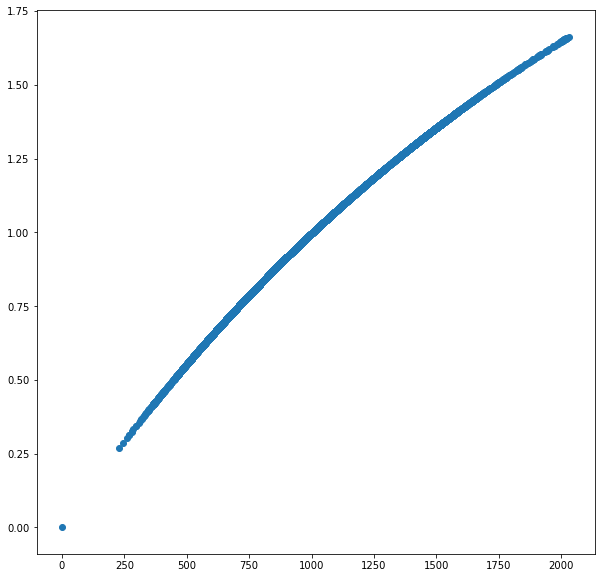

In [137]:
plt.scatter(a,v_mean)

In [134]:
v_mean[0]

array([ 0.87540293])

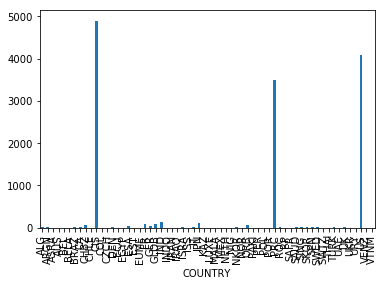

In [10]:
dfcountry = dataset.groupby(['COUNTRY'])['COUNTRY'].count()
dfcountry.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 10)

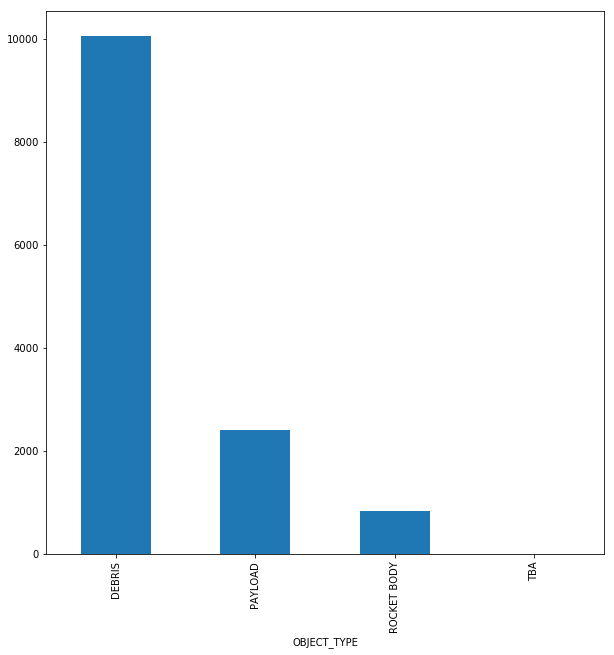

In [11]:
dfobjects = dataset.groupby(['OBJECT_TYPE'])['OBJECT_TYPE'].count()
dfobjects.plot(kind='bar')

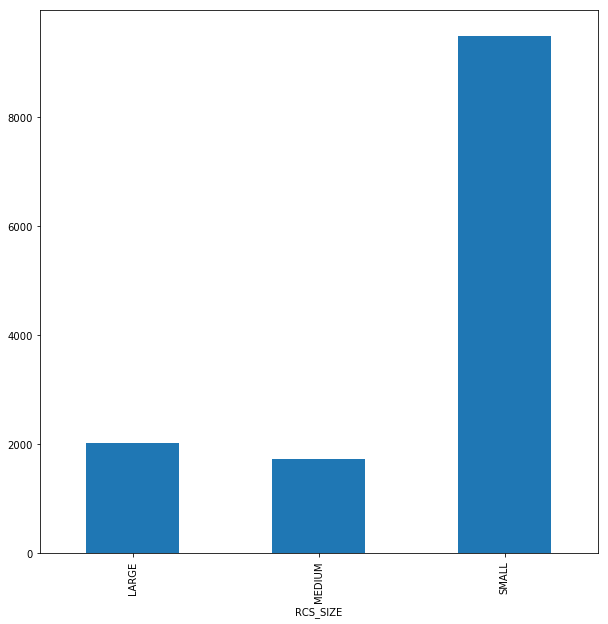

In [12]:
dfobjects = dataset.groupby(['RCS_SIZE'])['RCS_SIZE'].count()
dfobjects.plot(kind='bar')

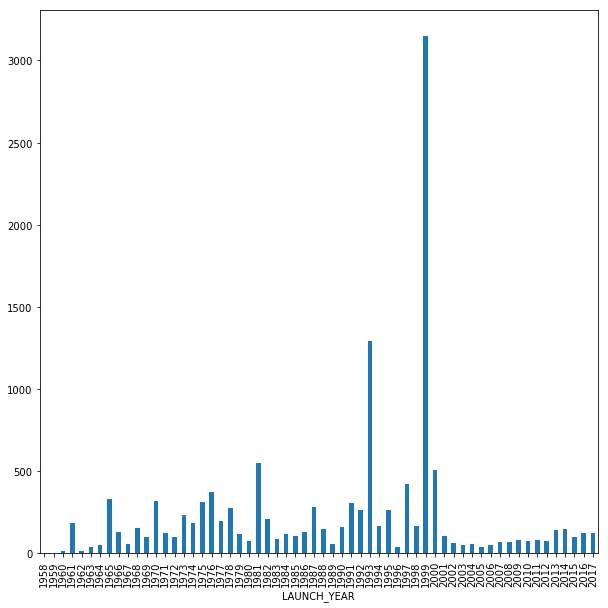

In [13]:
dfobjects = dataset.groupby(['LAUNCH_YEAR'])['LAUNCH_YEAR'].count()
dfobjects.plot(kind='bar')


In [14]:
v_mean.shape

(13299, 1)

In [77]:
orbit_speed = pd.DataFrame(v_mean)
orbit_speed.head()

,0
0,0.875403
1,0.874975
2,1.203773
3,0.631864
4,1.357929


In [79]:
# get the data  for the RCS, mean orbit speed
clus_data = pd.concat([dataset.RCS_SIZE, orbit_speed], axis=1)
clus_data.head()

,RCS_SIZE,0
0,SMALL,0.875403
1,SMALL,0.874975
2,SMALL,1.203773
3,SMALL,0.631864
4,SMALL,1.357929


In [80]:
obj_labl = pd.get_dummies(dataset[['OBJECT_TYPE', 'RCS_SIZE']])
obj_labl.head()

,OBJECT_TYPE_DEBRIS,OBJECT_TYPE_PAYLOAD,OBJECT_TYPE_ROCKET BODY,OBJECT_TYPE_TBA,RCS_SIZE_LARGE,RCS_SIZE_MEDIUM,RCS_SIZE_SMALL
0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1
2,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1


In [81]:
# Use k-means clustering to cluster the dataset
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

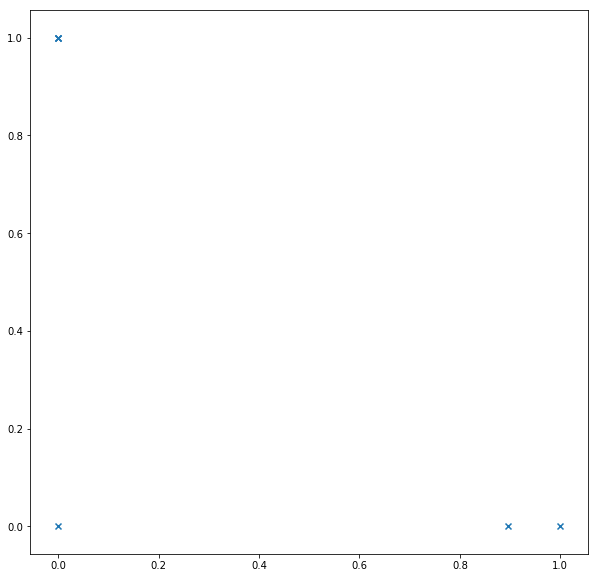

In [124]:
k_means = cluster.KMeans(n_clusters=6, random_state=0, n_jobs=-1,)
k_means.fit(obj_labl)

centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1], marker='x' )
plt.show()

In [73]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# X = clus_data[['RCS_SIZE', 0]].values
# size_le = LabelEncoder()
# # X[:,0] = size_le.fit_transform(X[:, 0])
# ohe = OneHotEncoder(categorical_features=[0])
# ohe.fit_transform(X).toarray()
# X

ValueError: could not convert string to float: 'MEDIUM'

In [ ]:
# ohe = OneHotEncoder(categorical_features=[0])
# ohe.fit_transform(X).toarray()

In [145]:
# Split into training and test data
# X = dataset.RCS_SIZE

labl_data = pd.get_dummies(clus_data[['RCS_SIZE', 0]])
# Y = orbit_speed
labl_data

,0,RCS_SIZE_LARGE,RCS_SIZE_MEDIUM,RCS_SIZE_SMALL
0,0.875403,0,0,1
1,0.874975,0,0,1
2,1.203773,0,0,1
3,0.631864,0,0,1
4,1.357929,0,0,1
5,1.276439,0,0,0
6,0.970277,0,0,1
7,1.407638,1,0,0
8,0.863912,0,0,1
9,1.203410,0,0,1


In [47]:
X_train, X_test = train_test_split(labl_data, test_size=0.20, train_size=0.80)
Y_train, Y_test = train_test_split(Y, train_size=.80, test_size=0.20)
# le = preprocessing.LabelEncoder()
# le.fit(train_data)
X_train.head()
# preprocessed_training_data[0]

In [57]:
# from sklearn.feature_extraction import DictVectorizer
# vec = DictVectorizer()
# vec.fit_transform(train_data).toarray()
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
# tree.fit(X_train,Y_train)


In [112]:
# Use k-means clustering to cluster the dataset
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [153]:
# Train the dataset using k-means
k_means = cluster.KMeans(n_clusters=3, random_state=0, n_jobs=-1, n_init=10, max_iter=500)
y_km = k_means.fit_predict(labl_data)

In [156]:
k_means.inertia_

732.62094130355263

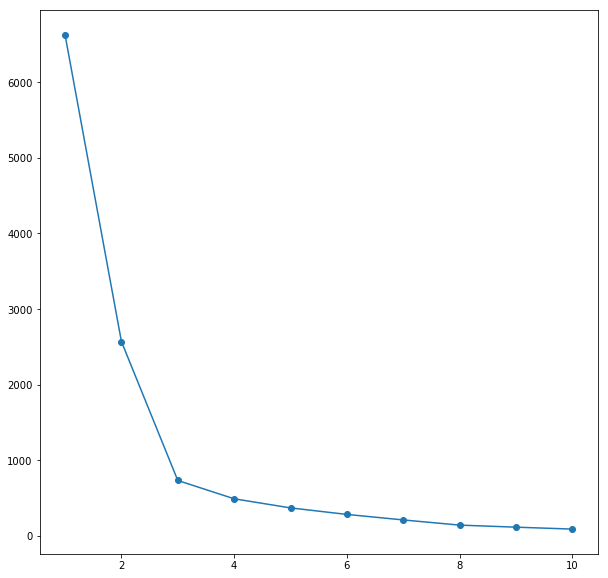

In [157]:
distortions = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(labl_data)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Dislocations')
plt.show()

In [144]:
X_train.head()
k_means.cluster_centers_[:,0]

array([ -4.52415883e-15,  -7.04991621e-15,   1.00000000e+00])

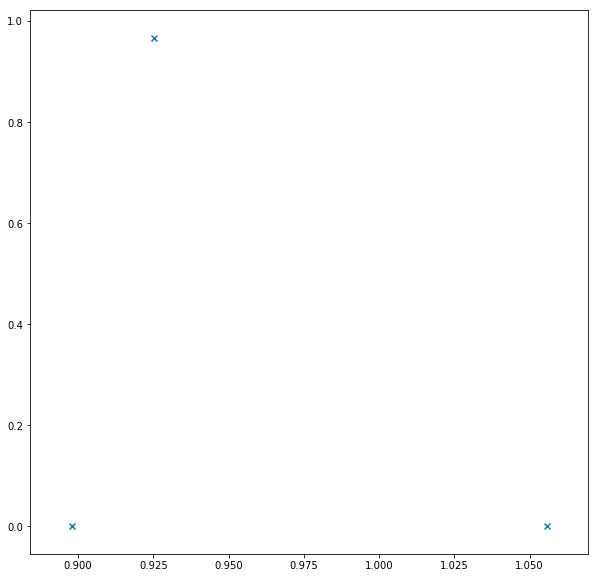

In [149]:
centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1], marker='x' )
plt.show()

In [151]:
plt.scatter(labl_data[y_km==0,0],
            labl_data[y_km==0,1],
           s=50,c='lightgreen',marker='s', label='Cluster 1'
           )

TypeError: unhashable type: 'numpy.ndarray'

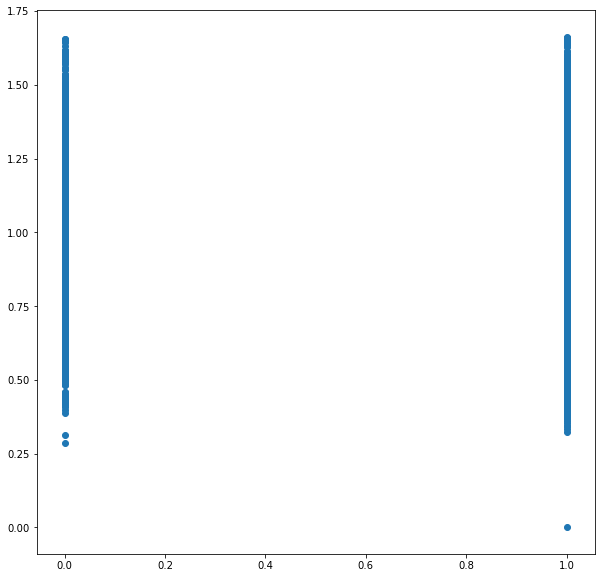

In [100]:
# assignment, cdist = cluster.vq.vq(X_train, Y_train)
pyplot.scatter(X_train['SMALL'], Y_train)
pyplot.scatter(Y_train, X_train['MEDIUM'])
pyplot.scatter(X_train['LARGE'], Y_train)
pyplot.show()